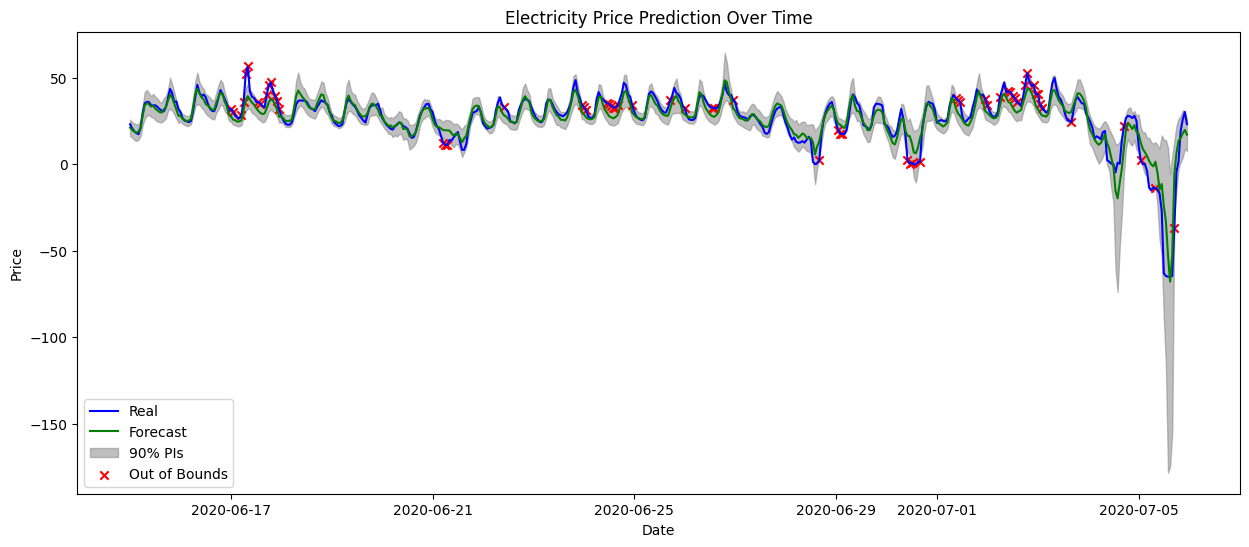

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Path to the CSV file
csv_file_path = "forecasts_ddnn_2/prediction_ensembled.csv"

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_file_path, index_col=0)

# Convert the index to a DateTime object
data.index = pd.to_datetime(data.index)

# Find the days when the real price is outside the bounds
out_of_bounds_days = data[(data['real'] < data['lower_bound_90']) | (data['real'] > data['upper_bound_90'])]

# Plot the real values, forecast, and 90% Prediction Intervals
plt.figure(figsize=(15, 6))
plt.plot(data['real'], label='Real', color='blue')
plt.plot(data['forecast'], label='Forecast', color='green')
plt.fill_between(data.index, data['lower_bound_90'], data['upper_bound_90'], color='gray', alpha=0.5, label='90% PIs')

# Highlight the out-of-bound days using scatter plot
plt.scatter(out_of_bounds_days.index, out_of_bounds_days['real'], color='red', label='Out of Bounds', marker='x')

plt.title('Electricity Price Prediction Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
# Print the days and corresponding values
if not out_of_bounds_days.empty:
    print("Days when the real price is outside the 90% Prediction Intervals:", len(data), len(out_of_bounds_days))
    print(out_of_bounds_days)
else:
    print("The real price is within the 90% Prediction Intervals on all days.")




Days when the real price is outside the 90% Prediction Intervals: 504 64
                      real   forecast  lower_bound_90  upper_bound_90
2020-06-17 00:00:00  32.05  27.607912       24.564274       30.636735
2020-06-17 01:00:00  30.38  25.854723       22.954901       28.718392
2020-06-17 05:00:00  28.76  25.506451       22.603562       28.369190
2020-06-17 06:00:00  35.96  31.499428       26.978249       35.923899
2020-06-17 07:00:00  51.93  37.235321       30.649289       43.908970
...                    ...        ...             ...             ...
2020-07-03 16:00:00  24.22  30.290937       25.030175       35.416214
2020-07-04 17:00:00  21.95   9.472456       -5.634259       21.824386
2020-07-05 01:00:00   2.19  12.463113        3.048800       21.306519
2020-07-05 08:00:00 -13.87   1.458601      -11.449870       12.720031
2020-07-05 17:00:00 -36.97  -5.993230      -29.060045       13.146525

[64 rows x 4 columns]
